<center><h1><font color="blue">Algorithme de Prédiction de la Qualité du Vin</font></h1></center>

### 1. Importation des bibliothèques :

In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lecture des données :

In [118]:
data = pd.read_csv ("winequality-red.csv")
data.head ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Analye exploratoire :

In [119]:
print ("Dimension des données :", data.shape)

Dimension des données : (1599, 12)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Axes(0.22375,0.11;0.5775x0.77)


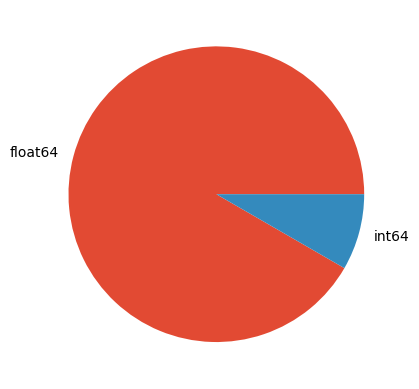

In [120]:
print (data.dtypes)
print (data.dtypes.value_counts ().plot.pie ())

In [121]:
(data.isna ().sum () / data.shape [0]).sort_values

<bound method Series.sort_values of fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64>

### Récaputilatif :
#### 3.1 Variable à prédire (variable cible ou target varable) : quality
#### 3.2 Dimensions :
    - Nombre de lignes : 1599
    - Nombre de colones : 12
#### 3.3 Type des variables :
    - features (fixed acidity, volatile acidity, ...) : float
    - target (quality) : int
#### 3.4 Valeurs manquantes :
    - aucune
    Il n'y a aucune valeur NaN donc pas besoin de faire du nettoyage de données.

### 4. Visualisation des données dans leur état initial :

/tmp/ipykernel_31519/2162373453.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist (ax = ax, layout = (3, 4), alpha = 0.5, label = 'x', color = 'blue')


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

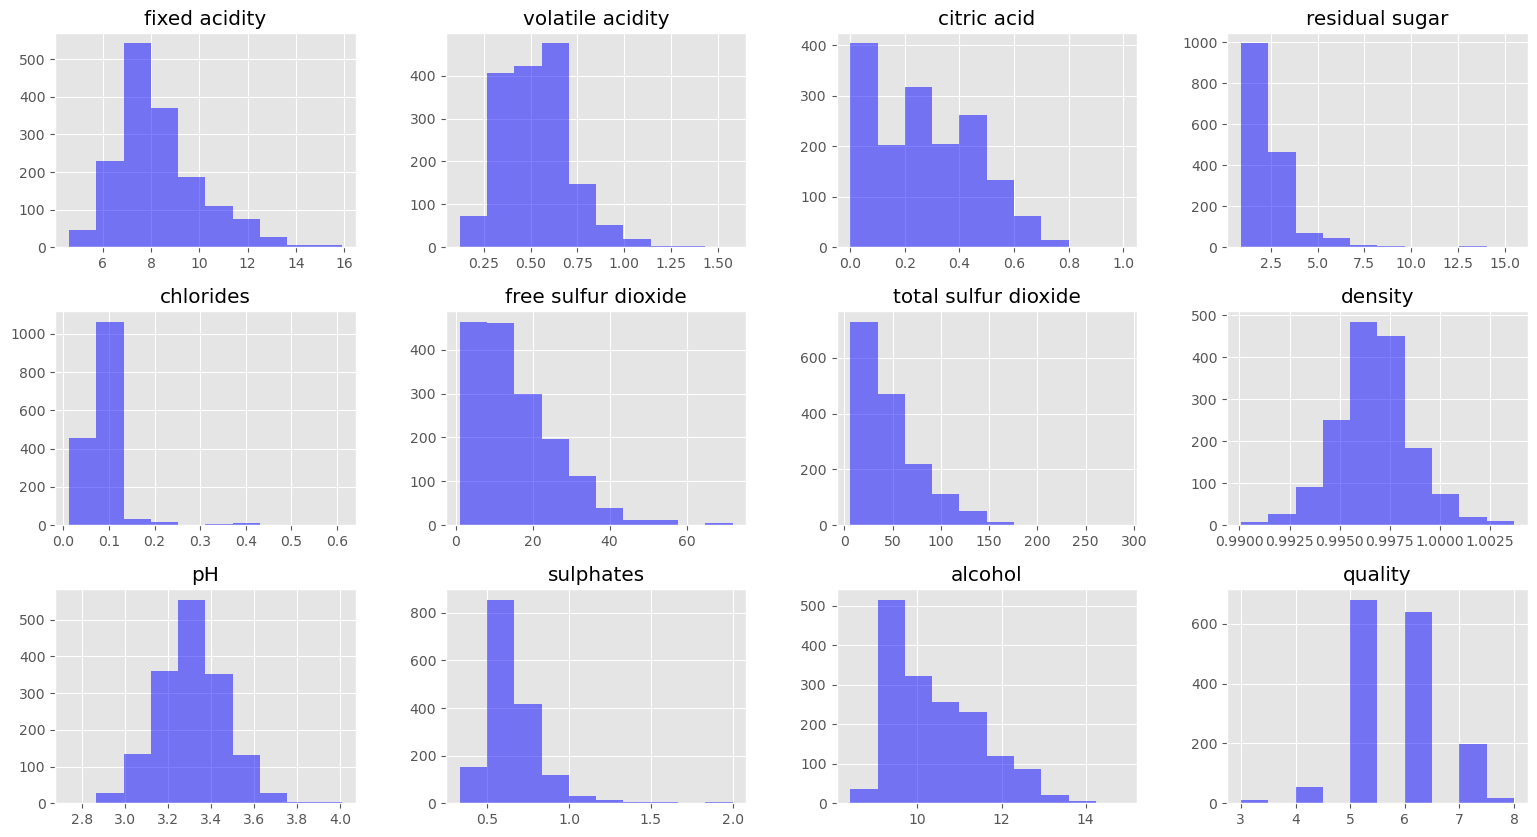

In [122]:
fig, ax = plt.subplots (figsize = (19, 10))
data.hist (ax = ax, layout = (3, 4), alpha = 0.5, label = 'x', color = 'blue')

### 5. Traitement des Valeurs abbérrantes
Pour le traitement des valeurs abbérrantes, nous allons utiliser la méthode IQR : Intervalle Interquartille ou Inter Quartile Range. Cette dernière sera appliquée à chaque colonne.